## Chicago Taxi Company Evaluation

SQL Project on Zuber 
Project will show competency on evaluating a Chicago based ride share app (Zuber) for patterns in the available information.  Details to be discovered are understanding passenger preferences and the impact of external factors on rides.

Several files will be uploaded:

1)company table contains data columns of:
company_name: taxi company name
trips_amount: the number of rides for each taxi company on November 15-16, 2017.

2)neighborhood_average_dropoff table contains data columns of:
dropoff_location_name: Chicago neighborhoods where rides ended
average_trips: the average number of rides that ended in each neighborhood in November 2017.

3)loop table contains data from previous SQL project regarding data from rides traveling between the Loop neighborhood to O'Hare International Airport.  The columns are:
start_ts
pickup date and time
weather_conditions
weather conditions at the moment the ride started
duration_seconds
ride duration in seconds

The files will be imported and studied. Evaluation will be made for each file type to ensure data types are correct.  Visual for top taxi companies will be generated. The top 10 neighborhoods will be identified in terms of drop-offs with visuals. Project will also test the following hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [1]:
#import libraries 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import plotly.graph_objects as go
from scipy.stats import ttest_ind


In [2]:
#import csv file 
company = pd.read_csv('/datasets/project_sql_result_01.csv')
print(company.head())
print(company.info())
#note that there are no empty columns
#the data types for each column seem correct.  The company name is an object and trips_amount is an integer.  


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [3]:
#check for duplicated values 
company.duplicated().sum()

0

In [4]:
#confirm no empty columns 
company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [5]:
top_company=company.sort_values(by='trips_amount', ascending=False)
top_company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [6]:
#check datatypes of dataframe 
top_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


<AxesSubplot:title={'center':'Most Used Taxi Companies for November 15/16, 2017'}, ylabel='Number of Trips'>

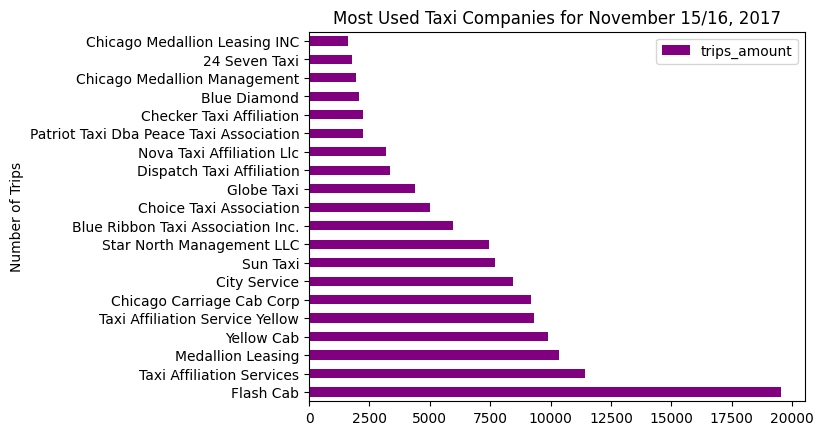

In [7]:
top_company.head(20).plot.barh(
title='Most Used Taxi Companies for November 15/16, 2017',
color='purple', 
x='company_name',
y='trips_amount',
xlabel='Number of Trips', 
ylabel='Taxi Company')

#x='trips_amount',
#y='company_name',
#xlabel='Number of Trips', 
#ylabel='Taxi Company')

The most popular taxi company to be used is "Flash Cab".  Flash Cab is now the lead competitior for Zuber.  Their name implies part of their service is successful due to their speed of answering calls.  Their number of completed trips is nearly double its closest four competitors. Unsure if their dominancy is due to the area they service, the number of employees, or types of services they provide (restricting range of rides).  

In [8]:
#import csv file 
neighborhood_average_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
print(neighborhood_average_dropoff.head())
print(neighborhood_average_dropoff.info())
#note that there are no empty columns
#the data types for each column seem correct.  The location name is an object and average_trips is a float.  

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [9]:
#check for duplicated values 
neighborhood_average_dropoff.duplicated().sum()

0

In [10]:
#confirm no empty columns 
neighborhood_average_dropoff.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [11]:
#sort the neighborhood_average_dropoff dataframe for highest value 
top_neighborhoods = neighborhood_average_dropoff.sort_values(by='average_trips', ascending=False)
top_neighborhoods.head(20)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot:title={'center':'Most Active Zuber Neighborhoods of November 2017'}, xlabel='Neighborhood', ylabel='Average Number of Trips'>

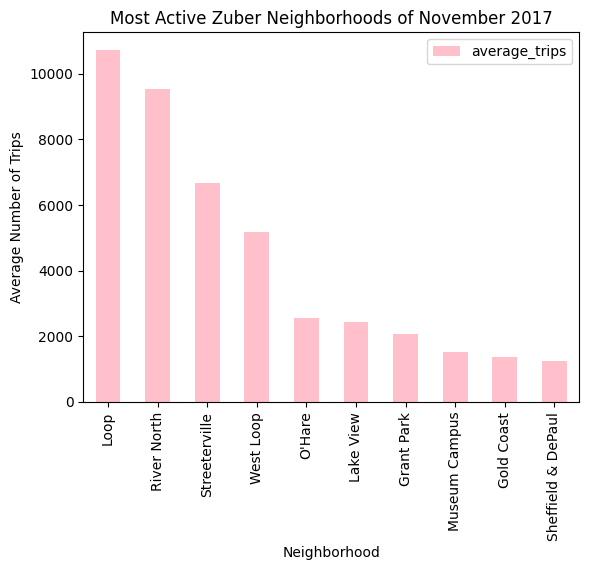

In [12]:
#add visualization for most active areas. 
top_neighborhoods.head(10).plot(
kind='bar',
title='Most Active Zuber Neighborhoods of November 2017',
color='pink', 
x='dropoff_location_name',
y='average_trips',
xlabel='Neighborhood', 
ylabel='Average Number of Trips')

The most popular neighborhood to take a Zuber is the Loop.  Seeing as this is the centralized business district of Chicago this makes sense.  Many people would be in the neighborhood without a car as a visitor or not want to utilize their own car in the area due to the difficulty in parking.  The least used neighborhood is Sheffield & DePaul which is less tourist area.   

In [13]:
#import csv file 
loop = pd.read_csv('/datasets/project_sql_result_07.csv')
print(loop.head())
print(loop.info())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [14]:
#check for duplicates
loop.duplicated().sum()

197

In [15]:
#evaluate if duplicate or unique values 
loop.value_counts()

start_ts             weather_conditions  duration_seconds
2017-11-11 08:00:00  Good                1380.0              8
2017-11-11 06:00:00  Good                1260.0              8
                                         1380.0              7
2017-11-11 16:00:00  Good                2400.0              6
2017-11-11 08:00:00  Good                1200.0              6
                                                            ..
2017-11-11 04:00:00  Good                1380.0              1
                                         1477.0              1
                                         1491.0              1
                                         1620.0              1
2017-11-25 23:00:00  Good                1500.0              1
Length: 871, dtype: int64

removed instruction to drop duplicates due to correct note above. 

In [16]:
#check for blank values
loop.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [17]:
#convert start_ts to date and time
loop['start_ts'] = pd.to_datetime(loop['start_ts'])

# Separate the data
rainy = loop[(loop['weather_conditions'] == 'Bad') & (loop['start_ts'].dt.dayofweek == 5)]['duration_seconds']
non_rainy = loop[(loop['weather_conditions'] == 'Good') & (loop['start_ts'].dt.dayofweek == 5)]['duration_seconds']

# Perform t-test
t_stat, p_value = ttest_ind(rainy, non_rainy, nan_policy='omit')

# Set significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant change in ride duration on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis. No significant change in ride duration on rainy Saturdays.")

Reject the null hypothesis. There is a significant change in ride duration on rainy Saturdays.


Hypothesis Testing 
Is the average duration of rides from the Loop to O'Hare International Airport change on rainy Saturdays? 

Null hypothesis is that the average duration of rides is the same, regardless of the weather. 
Alternative hypothesis is that average duration of rides differs according to the weather.  This will be evaluated by information on a rainy Saturday. Using alpha threshold of 0.05 becasue this demonstrates statistical signficance.   

General Conclusion:
    Zuber is aiming to be a new ride source for the Chicago area. Based on the data from a date in November their lead competitor will be a company called Flash Cab. Unsure if their dominancy is due to the area they service, the number of employees, or types of services they provide (restricting range of rides). Zuber could look into merging/purchasing their company since they have dominance.  An even more cost effective way would be to consider purchasing the 3/4th most popular companies (Medallion Leasing or Yellow Cab).  The price would be lower and the merge with Zuber would set Zuber up in the neighborhood as direct compeititors. This would help focus efforts on the three most popular areas (The Loop, River North, and Steeterville). These are all high tourist areas. However even in tourist areas the weather will effect the Zuber app.  Rides will take longer when there is precipitation.  